# Trainer:
Md. Jalal Uddin, Founder and director of Research Society email: dmjalal90@gmail.com, dmjalal90@nuist.edu.cn

# Install netcdf4

step 1: run Anaconda as Administrator

step 2: you need to use the following command if you are a anaconda user

conda install -c anaconda netcdf4 

Or you need to use the following command if you are a python user

pip install netCDF4

# Install Base map:

step 1: download whl file from https://www.lfd.uci.edu/~gohlke/pythonlibs/ link based on your python version

step 2: create a folder on "C" directory as "Basemap"

step 3: run Anaconda as Administrator

step 4: you need to install whl file by using the following command (please change the basemap file name if you are using different)

pip install C:\Basemap\basemap-1.2.2-cp37-cp37m-win_amd64.whl 

In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap   # https://matplotlib.org/basemap/users/examples.html

# Know your data

In [3]:

data = Dataset(r'../data/precipitation.nc')

print(data.variables.keys())

for var in data.variables.values():
    print(var)

dict_keys(['gwgt', 'lat', 'lon', 'time', 'prc'])
<class 'netCDF4._netCDF4.Variable'>
float32 gwgt(lat)
    long_name: gaussian weights
    short_name: gwgts
    units: dimensionless
unlimited dimensions: 
current shape = (64,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    short_name: lat
    long_name: latitude
    units: degrees_north
unlimited dimensions: 
current shape = (64,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    short_name: lon
    long_name: longitude
    units: degrees_east
unlimited dimensions: 
current shape = (128,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    long_name: Year-Month
    short_name: YRMO
    units: yyyymm
    _FillValue: -999
unlimited dimensions: 
current shape = (216,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float32 prc(time, lat, 

# Know your variable

In [4]:
data.variables['prc']

<class 'netCDF4._netCDF4.Variable'>
float32 prc(time, lat, lon)
    short_name: PRC
    long_name: Precipitation
    units: mm/day
    _FillValue: -999.0
unlimited dimensions: 
current shape = (216, 64, 128)
filling on

In [5]:
# We need to know the min lat for mapping
data.variables['lat'][:]

masked_array(data=[-87.8638   , -85.09653  , -82.31291  , -79.525604 ,
                   -76.7369   , -73.94752  , -71.15775  , -68.36776  ,
                   -65.57761  , -62.787354 , -59.99702  , -57.20663  ,
                   -54.4162   , -51.625732 , -48.83524  , -46.044727 ,
                   -43.254196 , -40.46365  , -37.673088 , -34.882523 ,
                   -32.091946 , -29.30136  , -26.510769 , -23.720175 ,
                   -20.929575 , -18.138971 , -15.348365 , -12.557756 ,
                    -9.767145 ,  -6.9765334,  -4.1859207,  -1.395307 ,
                     1.395307 ,   4.1859207,   6.9765334,   9.767145 ,
                    12.557756 ,  15.348365 ,  18.138971 ,  20.929575 ,
                    23.720175 ,  26.510769 ,  29.30136  ,  32.091946 ,
                    34.882523 ,  37.673088 ,  40.46365  ,  43.254196 ,
                    46.044727 ,  48.83524  ,  51.625732 ,  54.4162   ,
                    57.20663  ,  59.99702  ,  62.787354 ,  65.57761  ,
      

In [6]:
# We need to know the min lon for mapping
data.variables['lon'][:]

masked_array(data=[  0.    ,   2.8125,   5.625 ,   8.4375,  11.25  ,
                    14.0625,  16.875 ,  19.6875,  22.5   ,  25.3125,
                    28.125 ,  30.9375,  33.75  ,  36.5625,  39.375 ,
                    42.1875,  45.    ,  47.8125,  50.625 ,  53.4375,
                    56.25  ,  59.0625,  61.875 ,  64.6875,  67.5   ,
                    70.3125,  73.125 ,  75.9375,  78.75  ,  81.5625,
                    84.375 ,  87.1875,  90.    ,  92.8125,  95.625 ,
                    98.4375, 101.25  , 104.0625, 106.875 , 109.6875,
                   112.5   , 115.3125, 118.125 , 120.9375, 123.75  ,
                   126.5625, 129.375 , 132.1875, 135.    , 137.8125,
                   140.625 , 143.4375, 146.25  , 149.0625, 151.875 ,
                   154.6875, 157.5   , 160.3125, 163.125 , 165.9375,
                   168.75  , 171.5625, 174.375 , 177.1875, 180.    ,
                   182.8125, 185.625 , 188.4375, 191.25  , 194.0625,
                   196.875 , 199.6

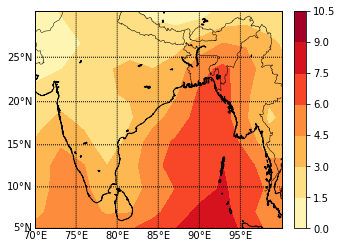

In [7]:

lat  = data.variables['lat'][:]
lon  = data.variables['lon'][:]
time = data.variables['time'][:]
prc  = data.variables['prc'][:]

mean_rainfall = np.mean(prc, axis=0)
#print(mean_rainfall)

# https://matplotlib.org/basemap/api/basemap_api.html

m = Basemap(projection  = 'merc',   # setup mercator map projection
             llcrnrlon  = 70,       # min lon
             llcrnrlat  = 5,        # min lat
             urcrnrlon  = 100,      # max lon
             urcrnrlat  = 30,       # max lat
             resolution = 'i')      # i = intermediate

lon, lat = np.meshgrid(lon,lat)
x,y      = m(lon,lat)


# list of colormaps: https://matplotlib.org/3.1.0/gallery/color/colormap_reference.html

colormap = m.contourf(x, y, mean_rainfall, cmap = 'YlOrRd') 

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='white')


# labels = [left,right,top,bottom]
# labels = [True,False,False,True]

m.drawparallels(np.arange(5, 30, 5),  labels = [1,0,0,0],fontsize=10)      # Draw lines of constant latitude
m.drawmeridians(np.arange(70, 100, 5),labels = [0,0,0,1],fontsize=10)      # Draw lines of constant longitude


cbar = m.colorbar(colormap, location = 'right', pad = '5%')

plt.savefig('precipitation.png',dpi = 300)
plt.show()


# Install geopandas


step 1: run Anaconda as Administrator

step 2: you need to use the following command if you are a anaconda user

conda install geopandas

Or you need to use the following command if you are a python user

pip install geopandas

pip install descartes

In [8]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [10]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

In [11]:
print(gdf.head())

           City    Country  Latitude  Longitude                     geometry
0  Buenos Aires  Argentina    -34.58     -58.66  POINT (-58.66000 -34.58000)
1      Brasilia     Brazil    -15.78     -47.91  POINT (-47.91000 -15.78000)
2      Santiago      Chile    -33.45     -70.66  POINT (-70.66000 -33.45000)
3        Bogota   Colombia      4.60     -74.08    POINT (-74.08000 4.60000)
4       Caracas  Venezuela     10.48     -66.86   POINT (-66.86000 10.48000)


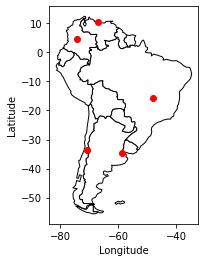

In [12]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()